In [1]:
from celeba_dcgan import Generator
import torch
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

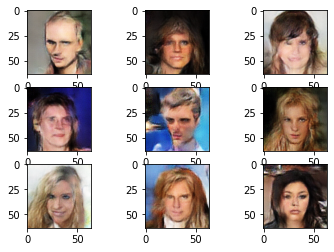

In [26]:
M = 3

def visualize_samples():
    batch_size = M*M
    d_z = 100
    gen = Generator(d_z).to(device)
    fname = "data/ckpts/ckpt_iter_{:07d}".format(8500)
    ckpt = torch.load(fname)
    gen.load_state_dict(ckpt["gen"])
    gen.eval()
    with torch.no_grad():
        z = 1.0*torch.randn((batch_size, d_z), device=device)
        fake_x = gen(z)
    fake_x = fake_x.cpu()
    imgs = np.transpose(torch.clamp(0.5+0.5*fake_x, 0.0, 1.0).numpy(), axes=[0, 2, 3, 1])
    show_img_grid(imgs)
    
def show_img_grid(imgs):
    for i in range(M):
        for j in range(M):
            idx = M*i+j
            plt.subplot(M, M, idx+1)
            img = imgs[idx]
            plt.imshow(img)
    plt.show()
    
visualize_samples()

In [ ]:
from PIL import Image

# save samples
def save_samples():
    batch_size = 32
    d_z = 100
    gen = Generator(d_z).to(device)
    ckpt_path = "data/ckpts/ckpt_iter_{:07d}".format(50000)
    ckpt = torch.load(ckpt_path)
    gen.load_state_dict(ckpt["gen"])
    gen.eval()
    
    sample_cnt = 0
    sample_limit = 1000
    
    while sample_cnt < sample_limit:
        with torch.no_grad():
            z = 1.0*torch.randn((batch_size, d_z), device=device)
            fake_x = gen(z)
        fake_x = fake_x.cpu()
        imgs = np.transpose(torch.clamp(0.5+0.5*fake_x, 0.0, 1.0).numpy(), axes=[0, 2, 3, 1])
        for idx in range(batch_size):
            img = imgs[idx]
            rescaled = (255.0*img).astype(np.uint8)
            pil_img = Image.fromarray(rescaled)
            img_path = 'data/images/samples/sample_{:04d}.png'.format(sample_cnt)
            pil_img.save(img_path)
            print("Created: ", img_path)
            sample_cnt += 1
            if sample_cnt >= sample_limit:
                break

save_samples()

In [ ]:
#from from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import random

def make_targets():
    dataroot='../../data/celeba/'
    image_size = 64
    ds = ImageFolder(
        root=dataroot,
        transform=transforms.Compose([
           transforms.Resize(image_size),
           transforms.CenterCrop(image_size)
        ])
    )
    sample_cnt = 0
    sample_limit = 1000
    while sample_cnt < sample_limit:
        full_N = len(ds)
        idx = random.randint(0, full_N-1)
        x, y = ds[idx]
        img_path = 'data/images/target/target_{:04d}.png'.format(sample_cnt)
        print("Created: ", img_path)
        x.save(img_path)
        sample_cnt += 1
    
make_targets()